# Глава 3. Визуализация данных

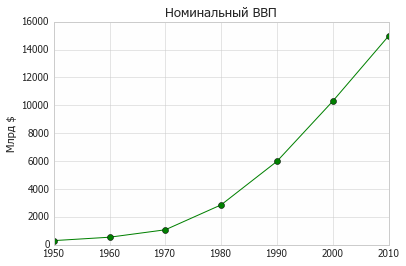

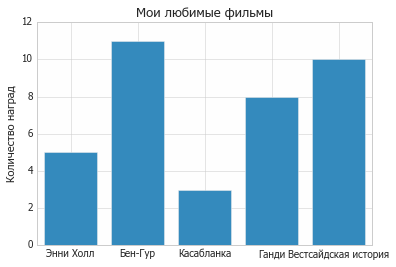

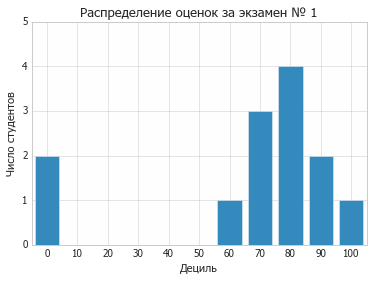

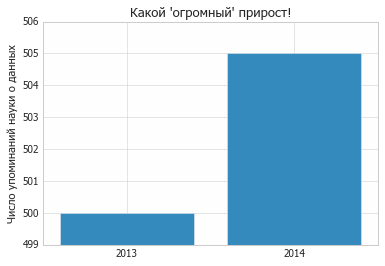

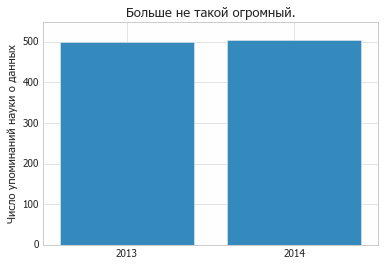

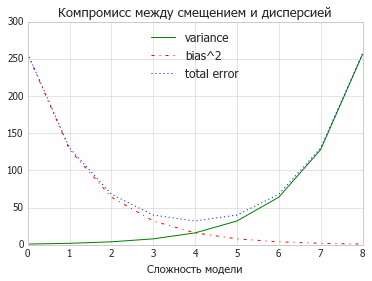

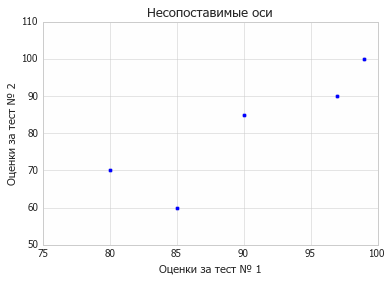

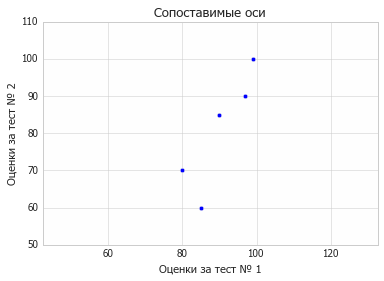

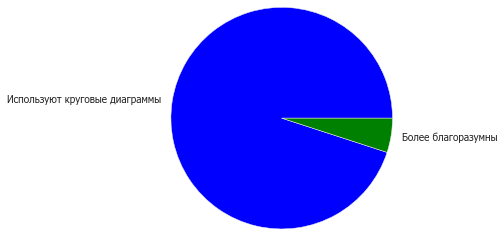

In [21]:
# -*- coding: utf-8 -*-

# visualizing_data.py

from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'}) # в Windows не работает
mpl.rcParams.update({'font.size': 12, 'font.family': 'Tahoma'})

%matplotlib inline  

def make_chart_simple_line_chart():
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]              # годы
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]  # ВВП

    # создать линейную диаграмму:, годы по оси X, ВВП по оси Y
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # добавить название диаграммы
    plt.title("Номинальный ВВП", fontsize=13)

    # добавить подпись к оси Y
    plt.ylabel("Млрд $", fontsize=11)
    plt.show()


def make_chart_simple_bar_chart():
    movies     = ["Энни Холл", "Бен-Гур", "Касабланка", "Ганди", "Вестсайдская история"]
    num_oscars = [5, 11, 3, 8, 10]

    # ширина столбцов по умолчанию 0.8, поэтому добавим 0.1 к левым
    # координатам, чтобы каждый столбец был по центру интервала
    xs = [i + 0.1 for i, _ in enumerate(movies)]

    # построить столбцы с левыми X-координатами [xs] и высотой [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("Количество наград", fontsize=11)
    plt.title("Мои любимые фильмы", fontsize=13)

    # добавить метки на оси X с названиями фильмов в центре каждого интервала
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
    plt.show()

def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10    # Дециль (десятая часть числа)
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # сдвинуть столбец влево на 4
            histogram.values(),                # назначить столбцу соответствующую высоту
            8)                                 # ширина каждого столбца 8
    plt.axis([-5, 105, 0, 5])                  # ось X от -5 до 105,
                                               # ось Y от 0 до 5
    plt.xticks([10 * i for i in range(11)])    # метки по оси X: 0, 10,..., 100
    plt.xlabel("Дециль", fontsize=11)
    plt.ylabel("Число студентов", fontsize=11)
    plt.title("Распределение оценок за экзамен № 1", fontsize=13)
    plt.show()

def make_chart_misleading_y_axis(mislead=True):
    mentions = [500, 505]  # упоминания
    years = [2013, 2014]   # годы

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("Число упоминаний науки о данных", fontsize=11)

    # если этого не сделать, matplotlib подпишет ось X как 0, 1
    # и добавит +2.013e3 в правом углу (недоработка matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # дезориентирующая ось Y только показывает то, что выше 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Какой 'огромный' прирост!", fontsize=13)
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Больше не такой огромный.", fontsize=13)
    plt.show()

def make_chart_several_line_charts():
    variance     = [1,2,4,8,16,32,64,128,256]    # дисперсия
    bias_squared = [256,128,64,32,16,8,4,2,1]    # квадрат смещения
    total_error  = [x + y for x, y in zip(variance, bias_squared)]  # суммарная ошибка

    xs = range(len(variance))

    # метод plt.plot можно вызывать много раз,
    # чтобы показать несколько графиков на одном и той же диаграмме:
    plt.plot(xs, variance,     'g-',  label='variance')    # зеленая сплошная линия
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # красная штрихпунктирная
    plt.plot(xs, total_error,  'b:',  label='total error') # синяя пунктирная

    # если для каждой линии задано название label,
    # то легенда будет показана автоматически,
    # loc=9 означает "наверху посередине"
    plt.legend(loc=9)
    plt.xlabel("Сложность модели", fontsize=11)
    plt.title("Компромисс между смещением и дисперсией", fontsize=13)
    plt.show()

def make_chart_scatter_plot():
    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]          # друзья
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]  # минуты
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']   # метки

    plt.scatter(friends, minutes)

    # назначить метку для каждой точки
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # задать метку
                     xytext=(5, -5),                  # и немного сместить ее
                     textcoords='offset points')

    plt.title("Зависимость между количеством минут и числом друзей", fontsize=13)
    plt.xlabel("Число друзей", fontsize=11)
    plt.ylabel("Время, проводимое на сайте ежедневно, мин", fontsize=11)
    plt.show()

def make_chart_scatterplot_axes(equal_axes=False):
    test_1_grades = [ 99, 90, 85, 97, 80]  # оценки за тест 1
    test_2_grades = [100, 85, 60, 90, 70]  # оценки за тест 2

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("Оценки за тест № 1", fontsize=11)
    plt.ylabel("Оценки за тест № 2", fontsize=11)

    if equal_axes:
        plt.title("Сопоставимые оси", fontsize=13)
        plt.axis("equal")
    else:
        plt.title("Несопоставимые оси", fontsize=13)
    plt.show()

def make_chart_pie_chart():
    plt.pie([0.95, 0.05], labels=["Используют круговые диаграммы", "Более благоразумны"])

    # make sure pie is a circle and not an oval
    plt.axis("equal")
    plt.show()


if __name__ == "__main__":

    make_chart_simple_line_chart()

    make_chart_simple_bar_chart()

    make_chart_histogram()

    make_chart_misleading_y_axis(mislead=True)

    make_chart_misleading_y_axis(mislead=False)

    make_chart_several_line_charts()

    make_chart_scatterplot_axes(equal_axes=False)

    make_chart_scatterplot_axes(equal_axes=True)

    make_chart_pie_chart()